# Intro
The fourteenth lesson of fast.ai.

# Lesson Overview

# Lecture Notes
Last time we implemented the chain rule in neural network training in back propagation. There's a really good explanation to help with last week! In lesson 13's resources.

Jeremy reexplaining lin_grad:
A loss function L is applied to the output of the neural network.
L(n(w,x))
To update the weights, we need to know how loss changes w.r.t weights.
To calculate this, let's rewrite L.
Call N=n(w,x).
So L(N). 
We can write our derivatives as:
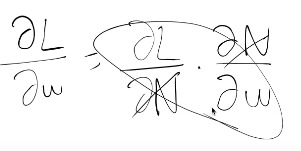

out.g contains the first derivative on the RHS.

We can write out the derivatives of the loss w.r.t the input:
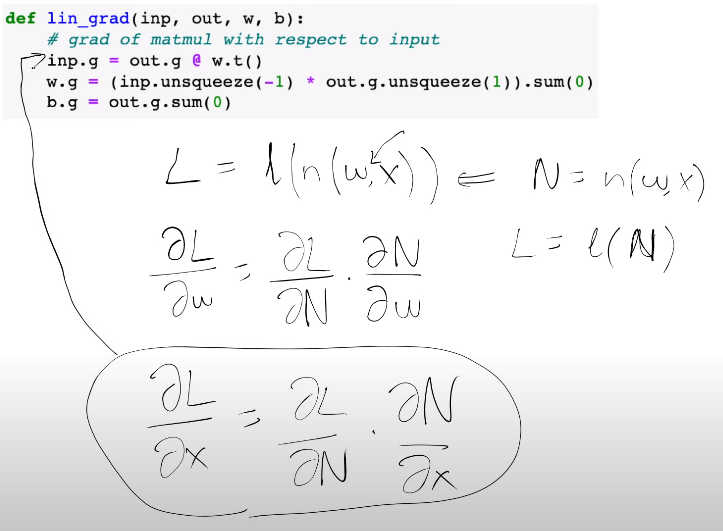

It matches onto this line of code, literally. inp.g = LHS.
The confusing part is, the dN/dx on the RHS is equal to w.t(), the weights themselves. In other words, the output of the neural network w.r.t to it's inputs depends on the weights, which makes sense!

And the middle line of code matches perfectly too!
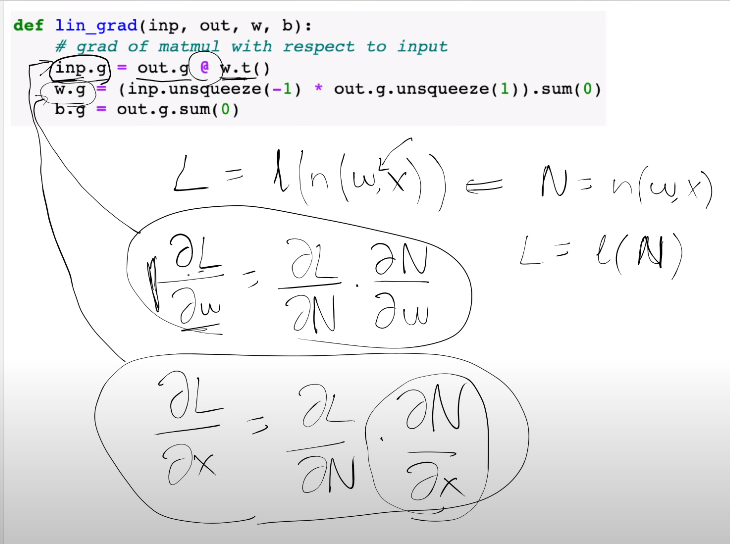

Last week, with all our code from scratch we got 97% accuracy! Albeit on training data.

With a format specifier we can write .2f to say, write it in 2 floating points. Python f strings are really helpful.

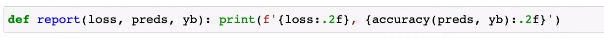

Let's refactoring our code. Making it cleaner and more consise. 
Pytorch feature. Submodel nn, the Module class.
We can create a instance of the Module class, then assign a linear layer as an attribute to it.
A module contains a linear layer called 'foo'.
Show me the parameters of Module.
4x3 tensor, and [4] biases.
Somehow, just creating Module, and asking module, did all of this cool stuff.

ml.named_children() is a kind of iterator called a generator. Putting a list() around it runs it for us.

We look at our own MLP class implementation.
MLP is just a forwards pass?

For MLP, we don't need __call__, because we refactored or something last week, we use def forward instead.

The key thing is MLP knows the layers (attributes) and weights (parameters)!

This is important because we can refactor our training code! Specifically the part where weights are updated. Just two lines of code changing.
Our fit function is a lot cooler now!
But how did our class know what the layers and parameters are automatically?
Because of a trick called __setattr__.
In __init__ we create a dictionary for each layer.
Then we defined __setattr__, this is called automatically by Python everytime you define an attribute (e.g. self.l1).
We check it doesn't start with an _ (that's used to private stuff?). If it doesn't, then, store it in the dictionary. Then use super to call whatever is in the superclass, the base class. What is super calling here, because there is no base (inheirted) class? If you create a class and don't put any brackets, e.g. MyModule() or MyModule. It's a shortcut to writing MyModule(object). Python has things in object to do normal object things. super is using one of them.

But how does it do we just write 
model
on a single line and it prints?
It uses __repr__

How did parameters work? 
Go through each module, go through each value, value is an actual layer. For each layer, then go through each parameter and yield p, an iterator.
Now we can use p to call them out.

Advanced python if you want:

There's no need to loop through a list or generator or iterator and yield.
for p in l.parameters(): yield p.

Instead, a shortcut.
Just 
yield from l.parameters()
meaning 'yield one at a time, everything from here'.

Now we know how to use nn.module, so let's use Pytorches!
How do we create the model that we stayed with, where we have our self.layers when we can register multiple layers at once using a list [nn.linear,nn.relu etc].

So we create a new Model class.
We store the layers.
Then we loop through them and call self.add_module to add them.

Again, __call__ is def forward now.
Now we can register multiple layers at a time.
nn.ModuleList does this for us.

Again, SequentialModel should have forward instead of __call__
In forward, we just get the result from each layer.

A cooler way to doing something. Using reduce:
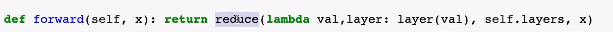

Is the same as

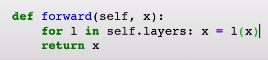

Reduce is a reduction, a funmental cs concept.
A reduction starts with an initial value. It's the third parameter, x.
Then the second parameter is looped through and the first parameter called each time.
Loop through a sequence, each of our layers. For each layer, call a function, the first parameter, "lambda val,layer: layer(val)".
The first time around the function is passed x with the first layer. The second time it takes the output of the first function pass, and passes that and the second layer. Essentially the first loop takes x and the linear layer, and the second takes the output from the linear layer, and ReLU.

A reduction is talked about a lot in papers and books as a general concept. There's no explicit loop althrough it occurs internally.


To continue cleaning up our training code, we create a new class.
An optimiser class automatates parameters with the parameters and learning rate. p.grad.data.zero_() is the same as torch.nograd
We pass it the parameters to optimise and the learning rate. It stores them. Specifically the parameters might be a generator so we use list() on em!

We create opt with mode.parameters nn.Module makes for us.
Now we create our new loop! just opt.step() and opt.zero_grad().

An SGD optimiser isn't actually much code at all! If you're having trouble understanding a framework, doing it all from scratch will really clear it up.

get_model() returns a model and it's optimiser.
And now our training code for torch's optimiser.

Further simpler still!
The Dataset class.
We pass in our independent and dependent variable and store len.
__len__ allows len to work
__getitem__ is called whenever you use square brackets [] in python. We return a tuple of the x and y values.
Using assert to check lengths are the same.

Now for training loop, just clean up the dataset line.

Our using a data loader.
We need an iterator. A class with a __iter__ method.
When you do for i in list, you actually are calling __iter__ which loops through using yield.

A DataLoader has a dataset and a batch size we which store.
When for call a for loop, we go through the dataset, skipping bs values, and yield the correct dataset slice.

Remember, the way to get one thing from a iterator is using iter.
next() grabs one value from it.

Now simplifying fit using dataloaders to remove the explicit for loop.
Now that our code is nice and concise, we can add features.

Instead of always making our dataset going in order. E.g. the dataset is 500 values, so the first epoch we do values 1-50, then second 51-100 etc.
We want to randomise which values we do each epoch. Shuffle around the indexes of those 500 values.

We define Sampler to do so.
We create a Sampler without Shuffle (w/o randomising), it simpty returns all the numbers from 0-n as an iterator. No order change.
But with Shuffle=True, then it randomly shuffles those numbers.

# Links
- As I am doing this course as it is released privately live, I cannot share links to the lesson.